# ATMS 523

## Module 5 Project

For this assignment, use the dataset called `radar_parameters.csv` provided in the GitHub repository in the folder `homework`.

## Dataset Description

The training data consists of polarimetric radar parameters calculated from a disdrometer (an instrument that measures rain drop sizes, shapes, and rainfall rate) measurements from several years in Huntsville, Alabama. A model called `pytmatrix` is used to calculate polarimetric radar parameters from the droplet observations, which can be used as a way to compare what a remote sensing instrument would see and rainfall.

## Data columns

Features (radar measurements):

`Zh` - radar reflectivity factor (dBZ) - use the formula $dBZ = 10\log_{10}(Z)$

`Zdr` - differential reflectivity

`Ldr` - linear depolarization ratio

`Kdp` - specific differential phase

`Ah` - specific attenuation

`Adp` - differential attenuation

Target :

`R` - rain rate

1. Split the data into a 70-30 split for training and testing data.


In [1]:
import os

# Check if the directory exists before cloning
# jupyter code below
mac_path = '/Users/joeybahret/Documents/Grad_School/ATMS_523/Module 5/ATMS-523-Module-5'
if not os.path.exists(mac_path):
# uncomment for colab if not os.path.exists('ATMS-523-Module-5'):

  !git clone https://github.com/jbb-illini/ATMS-523-Module-5.git
else:
  print("Directory 'ATMS-523-Module-5' already exists. Skipping clone.")

Directory 'ATMS-523-Module-5' already exists. Skipping clone.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_name = 'radar_parameters.csv'
colab_file_path = '/content/ATMS-523-Module-5/homework/'
jupyter_file = '/Users/joeybahret/Documents/Grad_School/ATMS_523/Module 5/ATMS-523-Module-5/homework/'

#data = pd.read_csv(colab_file_path+file_name, index_col=0)

data = pd.read_csv(jupyter_file+file_name, index_col=0)
X = data.drop('R (mm/hr)', axis=1)
y = data['R (mm/hr)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Data loaded and seperated.')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Data loaded and seperated.


((13278, 6), (5691, 6), (13278,), (5691,))

2. Using the split created in (1), train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset.  Compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred_lr = model.predict(X_train)
y_test_pred_lr = model.predict(X_test)

# Evaluate Linear Regression model
r2_train_lr = r2_score(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))

r2_test_lr = r2_score(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

print("Linear Regression Model Performance:")
print(f"Training R^2: {r2_train_lr:.4f}")
print(f"Training RMSE: {rmse_train_lr:.4f}")
print(f"Testing R^2: {r2_test_lr:.4f}")
print(f"Testing RMSE: {rmse_test_lr:.4f}")
print('-'*50)
##### Creating Baseline

# Get Zh (dBZ) from the test features
Zh_dBZ_test = X_test['Zh (dBZ)']

# Convert Zh (dBZ) to Z (linear units)
Z_linear_test = 10**(Zh_dBZ_test / 10)

# Calculate baseline rain rate (R_baseline) on the test set
R_baseline_test = (Z_linear_test / 200)**(1 / 1.6)

# Evaluate the Baseline Model using the true test values (y_test)
r2_baseline_test = r2_score(y_test, R_baseline_test)
rmse_baseline_test = np.sqrt(mean_squared_error(y_test, R_baseline_test))
print(f"Baseline Model R^2 (Test Data): {r2_baseline_test:.4f}")
print(f"Baseline Model RMSE (Test Data): {rmse_baseline_test:.4f}")


Linear Regression Model Performance:
Training R^2: 0.9888
Training RMSE: 0.9148
Testing R^2: 0.9869
Testing RMSE: 0.9584
--------------------------------------------------
Baseline Model R^2 (Test Data): 0.2266
Baseline Model RMSE (Test Data): 7.3524


### Based on the residuals plot above for the Z values compared to the residuals from the linear regression below, it appears that the linear regression models do no accurately capture the data's complexities. It's likely that the polynomial regression will be a better fit.

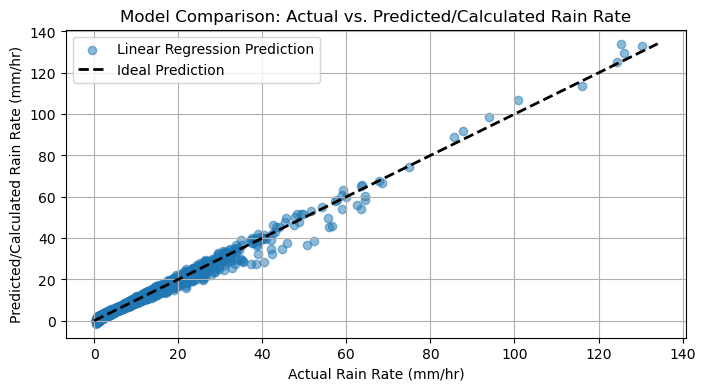

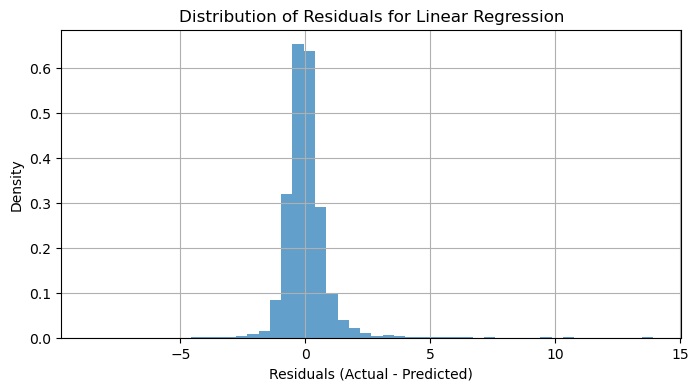


Standard deviation of y: 8.5692 mm/hr
Standard deviation of y_test: 8.3612 mm/hr
Standard deviation of y_test_pred_lr: 8.2697 mm/hr


In [59]:
import numpy as np


plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_test_pred_lr, alpha=0.5, label='Linear Regression Prediction')

# 45 degree ideal line
max_val = max(y_test.max(), y_test_pred_lr.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel("Actual Rain Rate (mm/hr)")
plt.ylabel("Predicted/Calculated Rain Rate (mm/hr)")
plt.title("Model Comparison: Actual vs. Predicted/Calculated Rain Rate")
plt.grid(True)
plt.legend()
plt.show()
# Calculate residuals
residuals = y_test - y_test_pred_lr
print('\n')
# Plot the distribution of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=50, density=True, alpha=0.7)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Density")
plt.title("Distribution of Residuals for Linear Regression")
plt.grid(True)
plt.show()

std_dev_y = np.std(y)
std_dev_y_test = np.std(y_test, ddof=1)
std_dev_y_test_pred_lr = np.std(y_test_pred_lr, ddof=1)

print(f"\nStandard deviation of y: {std_dev_y:.4f} mm/hr")
print(f"Standard deviation of y_test: {std_dev_y_test:.4f} mm/hr")
print(f"Standard deviation of y_test_pred_lr: {std_dev_y_test_pred_lr:.4f} mm/hr")


3. Repeat 1 doing a grid search over polynomial orders, using a grid search over orders 0-9, and use cross-validation of 7 folds.  For the best polynomial model in terms of $R^2$, does it outperform the baseline and the linear regression model in terms of $R^2$ and root mean square error?

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'polynomialfeatures__degree': np.arange(10),
              #'linearregression__fit_intercept': [True, False]
             }

print("Parameter Grid:", param_grid)

Parameter Grid: {'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import time
import math

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# Set up the GridSearchCV object
# Use multiple scoring metrics and set refit to 'r2'
grid_search = GridSearchCV(PolynomialRegression(),
                           param_grid,
                           cv=7,
                           scoring={'r2': make_scorer(r2_score),
                                    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False)},
                           refit= 'r2',
                           n_jobs=1
)

print("Grid set-up completed. Starting GridSearch.")

start_time = time.time() # Record the start time
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

end_time = time.time() # Record the end time
total_time = end_time - start_time

print("Grid Search completed.")

def convert_seconds_to_min_sec(total_seconds):
    """
    Converts a float representing total seconds into a M:SS.ss format string.
    """
    if total_seconds < 0:
        return "0:00.00"

    # 1. Calculate whole minutes
    minutes = math.floor(total_seconds / 60)
    
    # 2. Calculate remaining seconds (with the decimal portion)
    seconds = total_seconds % 60
    
    # 3. Format the result as M:SS.ss (pad seconds with a leading zero if needed)
    # The '.2f' formats the seconds to two decimal places
    return f"{minutes:0.0f}:{seconds:05.2f}"

# Example Usage:
formatted_time = convert_seconds_to_min_sec(total_time)

print(f"Total time of {total_time} seconds is: {formatted_time}")

Grid set-up completed. Starting GridSearch.
Grid Search completed.
Total time of 371.6944272518158 seconds is: 6:11.69


In [21]:
# Get the results of the grid search
results = grid_search.cv_results_

# Create a DataFrame to display the results
grid_search_results_df = pd.DataFrame({
    'Rank': results['rank_test_r2'],
    'Poly Deg': results['param_polynomialfeatures__degree'],
    'R^2': results['mean_test_r2'],
    'RMSE' : results['mean_test_neg_mean_squared_error'] * -1
})

# Sort by rank
grid_search_results_df = grid_search_results_df.sort_values(by='Rank')

display(grid_search_results_df)

,Rank,Poly Deg,R^2,RMSE
8,1,8,0.999973,0.002760
7,2,7,0.999936,0.005467
4,3,4,0.999926,0.006628
9,4,9,0.999851,0.012571
6,5,6,0.999761,0.019091
2,6,2,0.999465,0.040494
5,7,5,0.999319,0.056925
3,8,3,0.999202,0.063145
1,9,1,0.987312,0.905613
0,10,0,-0.001366,74.961463


In [22]:
grid_search_results_df.to_csv('gridsearch_results.csv', index = False)

4. Repeat 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
   
   ```python
     {
     "bootstrap": [True, False],
     "max_depth": [10, 100],
     "max_features": ["sqrt", 1.0],  
     "min_samples_leaf": [1, 4],
     "min_samples_split": [2, 10],
     "n_estimators": [200, 1000]
     }
   ```

Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of $R^2$ and root mean square error?

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
param_grid_rf = {
 "bootstrap": [True, False],
 "max_depth": [10, 100],
 "max_features": ["sqrt", 1.0],  
 "min_samples_leaf": [1, 4],
 "min_samples_split": [2, 10],
 "n_estimators": [200, 1000]}

print("Random Forest Parameter Grid:")
print(param_grid_rf)

Random Forest Parameter Grid:
{'bootstrap': [True, False], 'max_depth': [10, 100], 'max_features': ['sqrt', 1.0], 'min_samples_leaf': [1, 4], 'min_samples_split': [2, 10], 'n_estimators': [200, 1000]}


In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Initiate a RandomForestRegressor object
rf_model = RandomForestRegressor(random_state=42)

# Instantiate a GridSearchCV object
grid_search_rf = GridSearchCV(rf_model,
                              param_grid_rf,
                              cv=7,
                              scoring={'r2': make_scorer(r2_score), 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False)},
                              refit='r2',
                              n_jobs=1,
                              verbose = 1
                            )

print("RandomizedSearchCV setup complete for Random Forest Regressor.")

RandomizedSearchCV setup complete for Random Forest Regressor.


In [15]:
grid_search_rf.fit(X_train, y_train)

print("Random Forest Grid Search completed.")

Fitting 7 folds for each of 64 candidates, totalling 448 fits
Random Forest Grid Search completed.


In [28]:
# Get the results of the grid search
results_rf = grid_search_rf.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_polynomialfeatures__degree', 'params', 'split0_test_r2', 'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2', 'split5_test_r2', 'split6_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2', 'split0_test_neg_mean_squared_error', 'split1_test_neg_mean_squared_error', 'split2_test_neg_mean_squared_error', 'split3_test_neg_mean_squared_error', 'split4_test_neg_mean_squared_error', 'split5_test_neg_mean_squared_error', 'split6_test_neg_mean_squared_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error', 'rank_test_neg_mean_squared_error'])

In [37]:
# Create a DataFrame to display the results
rf_search_results_df = pd.DataFrame({
    #'Polynomial Degree': results['param_polynomialfeatures__degree'],
    'Params': results_rf['params'],

    'Rank': results_rf['rank_test_r2'],
    'R^2': results_rf['mean_test_r2'],
    'RMSE' : results_rf['mean_test_neg_mean_squared_error'] * -1
})

# Sort by rank
rf_search_results_df = rf_search_results_df.sort_values(by='Rank')

display(rf_search_results_df)

,Params,Rank,R^2,RMSE
24,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",1,0.977601,1.845212
25,"{'bootstrap': True, 'max_depth': 100, 'max_fea...",2,0.977152,1.888463
49,"{'bootstrap': False, 'max_depth': 100, 'max_fe...",3,0.976784,1.893643
8,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",4,0.976754,1.904150
48,"{'bootstrap': False, 'max_depth': 100, 'max_fe...",5,0.976502,1.908281
...,...,...,...,...
44,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",60,0.965599,2.706666
46,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",61,0.964674,2.765923
47,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",62,0.964655,2.768155
43,"{'bootstrap': False, 'max_depth': 10, 'max_fea...",63,0.964289,2.815555


In [38]:
rf_search_results_df.to_csv("random_forest_search_results.csv", index=False)

In [35]:
grid_search_rf.best_params_
best_rf_params = {'bootstrap': True,
 'max_depth': 100,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [40]:
import pickle
import joblib # Often preferred over pickle for large scikit-learn objects

# --- Assuming 'grid_search_rf' is your fitted RandomizedSearchCV object ---
file_name = "random_forest_search_results.pkl"

# Using joblib is often recommended for scikit-learn objects for efficiency
# joblib.dump(grid_search_rf, file_name)

# Or, using pickle:
with open(file_name, 'wb') as f:
    pickle.dump(grid_search_rf, f)
    
print(f"The complete RandomizedSearchCV object has been saved to '{file_name}'")

The complete RandomizedSearchCV object has been saved to 'random_forest_search_results.pkl'


In [41]:
import pickle
import joblib # Often preferred over pickle for large scikit-learn objects

# --- Assuming 'grid_search_rf' is your fitted RandomizedSearchCV object ---
file_name = "poly_search_results.pkl"

# Using joblib is often recommended for scikit-learn objects for efficiency
# joblib.dump(grid_search_rf, file_name)

# Or, using pickle:
with open(file_name, 'wb') as f:
    pickle.dump(grid_search, f)
    
print(f"The complete RandomizedSearchCV object has been saved to '{file_name}'")


The complete RandomizedSearchCV object has been saved to 'ploy_search_results.pkl'


In [57]:

print(f"Baseline Model R^2 (Test Data): {r2_baseline_test:.4f}")
print(f"Baseline Model RMSE (Test Data): {rmse_baseline_test:.4f}")
print('-'*50)

### Linear regression R^2 & RMSE
print(f"Training R^2: {r2_train_lr:.4f}")
print(f"Training RMSE: {rmse_train_lr:.4f}")
print(f"Testing R^2: {r2_test_lr:.4f}")
print(f"Testing RMSE: {rmse_test_lr:.4f}")
print('-'*50)

### Running best polynomial model
best_rf_model = grid_search.best_estimator_
y_test_pred_rf = best_rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_test_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))


print(f"Best GridSearchCV Model R^2 (Test Data): {rf_r2:.4f}")
print(f"Best GridSearchCV Model RMSE (Test Data): {rf_rmse:.4f}")
print('-'*50)


best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the independent test data
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate R^2 and RMSE
rf_r2 = r2_score(y_test, y_test_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"Best Optimized Random Forest Test R^2: {rf_r2:.4f}")
print(f"Best Optimized Random Forest Test RMSE: {rf_rmse:.4f}")

Baseline Model R^2 (Test Data): 0.2266
Baseline Model RMSE (Test Data): 7.3524
--------------------------------------------------
Training R^2: 0.9888
Training RMSE: 0.9148
Testing R^2: 0.9869
Testing RMSE: 0.9584
--------------------------------------------------
Best GridSearchCV Model R^2 (Test Data): 0.9999
Best GridSearchCV Model RMSE (Test Data): 0.0697
--------------------------------------------------
Best Optimized Random Forest Test R^2: 0.9523
Best Optimized Random Forest Test RMSE: 1.8268


## In this case, my polynomial model from my gridsearchCV is the best choice for this dataset since it provided a near perfect fit to the test data. The Random Forest model's hyperparameter search wasn't able to find a combination that could beat the performance of the simpler linear or polynomial approaches. This might suggest the underlying relationship between the radar parameters and rain rate is  polynomial in nature, and the complexity of the Random Forest introduced unnecessary variance in terms of underfitting/overfitting that degraded its performance.

In [4]:
import pickle
file_name = 'poly_search_results.pkl'
with open(file_name, 'rb') as f:
    rf_grid_search2 = pickle.load(f)

    
file_name = 'random_forest_search_results.pkl'
with open(file_name, 'rb') as f:
    grid_search_rf2 = pickle.load(f)

rf_grid_search2

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             refit='r2',
             scoring={'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'r2': make_scorer(r2_score, response_method='predict')})